In [4]:
import pyAgrum.lib.notebook as gnb
import pyAgrum as gum
import otagrum as otagr
import openturns as ot
import os
import os.path as path
import sys
sys.path.append('..')
import hill_climbing as hc
import score as sc
import numpy as np

In [5]:
directory = "../../data/samples/gaussian/asia/r08"

In [6]:
train_file = path.join(directory, "asia_gaussian_sample_01.csv")
test_file = path.join(directory, "asia_gaussian_sample_02.csv")
train, test = ot.Sample.ImportFromTextFile(train_file, ',')[:10000], ot.Sample.ImportFromTextFile(test_file, ',')[0:1000]

### Continuous PC

In [7]:
learner = otagr.ContinuousPC(train, 5, 0.05)
ndag = learner.learnDAG()

In [8]:
print("Description", ndag.getDescription())
print("Nodes", ndag.getNodes())
print("DAG", ndag)

Description [asia,tub,bronc,dysp,either,xray,smoke,lung]
Nodes [3,6,1,4,7,2,0,5]
DAG [asia,tub,bronc,dysp,either,xray,smoke,lung]
[dysp->bronc,tub->either,either->dysp,either->xray,lung->smoke,lung->either,bronc->smoke,asia->tub]



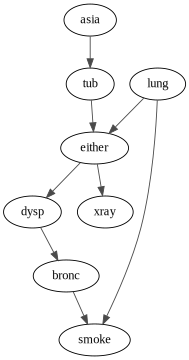

In [9]:
gnb.showDot(ndag.toDot())

In [10]:
order = ndag.getTopologicalOrder()
TTest = otagr.ContinuousTTest(train, 0.05)
jointDistributions = []  
for i in range(order.getSize()):
    d = 1+ndag.getParents(i).getSize()
    K = TTest.GetK(len(train), d)
    indices = [int(n) for n in ndag.getParents(i)]
    indices = [i] + indices
    bernsteinCopula = ot.EmpiricalBernsteinCopula(train.getMarginal(indices), K, False)
    jointDistributions.append(bernsteinCopula)

In [11]:
cbn = otagr.ContinuousBayesianNetwork(ndag, jointDistributions)
ll = 0
count=0
for (i,t) in zip(range(len(test)),test):
    print("Iteration ", i+1)
    print("Ligne en entrée ", t)
    lp = cbn.computeLogPDF(t)
    if (np.abs(lp) < 10):
    #if True:
        ll += lp
        count += 1
    print("Delta ", lp)
    print("Valeur de la somme ", ll)
    print("\n")
ll /= count

Iteration  1
Ligne en entrée  [0.338268,0.59873,0.365036,0.721328,0.924264,0.936416,0.571251,0.750876]
Delta  1.483331681524488
Valeur de la somme  1.483331681524488


Iteration  2
Ligne en entrée  [0.307391,0.134903,0.489386,0.177256,0.213784,0.184236,0.39467,0.699053]
Delta  1.939056674566388
Valeur de la somme  3.4223883560908757


Iteration  3
Ligne en entrée  [0.677044,0.823763,0.915282,0.79443,0.680165,0.305782,0.840679,0.343819]
Delta  1.0559390426554485
Valeur de la somme  4.478327398746324


Iteration  4
Ligne en entrée  [0.662157,0.280408,0.250468,0.459134,0.140452,0.0983278,0.210167,0.139863]
Delta  1.3033299889737637
Valeur de la somme  5.781657387720088


Iteration  5
Ligne en entrée  [0.472701,0.789501,0.244749,0.279824,0.564252,0.579389,0.442865,0.361384]
Delta  0.92108263058011
Valeur de la somme  6.702740018300198


Iteration  6
Ligne en entrée  [0.659059,0.264536,0.591928,0.611491,0.627665,0.809819,0.716886,0.407724]
Delta  0.31060935786203137
Valeur de la somme  7.01

Delta  3.44631986737607
Valeur de la somme  95.2814357783881


Iteration  56
Ligne en entrée  [0.0679329,0.147957,0.495419,0.462598,0.595418,0.547886,0.651749,0.86328]
Delta  1.074132802734838
Valeur de la somme  96.35556858112294


Iteration  57
Ligne en entrée  [0.87576,0.648404,0.371458,0.475079,0.506262,0.582335,0.330585,0.45123]
Delta  1.362778698461086
Valeur de la somme  97.71834727958402


Iteration  58
Ligne en entrée  [0.809762,0.563345,0.313515,0.114001,0.0557632,0.247802,0.13482,0.158417]
Delta  1.0898748941966887
Valeur de la somme  98.8082221737807


Iteration  59
Ligne en entrée  [0.641039,0.601614,0.59013,0.581457,0.39416,0.645445,0.187273,0.254695]
Delta  1.2708162555249745
Valeur de la somme  100.07903842930568


Iteration  60
Ligne en entrée  [0.0219302,0.0411567,0.191471,0.160361,0.0378603,0.104623,0.121324,0.153061]
Delta  5.834075713190145
Valeur de la somme  105.91311414249583


Iteration  61
Ligne en entrée  [0.0520362,0.302998,0.959021,0.203465,0.332317,0.3613,

Delta  1.7143753154240817
Valeur de la somme  171.4656520507271


Iteration  111
Ligne en entrée  [0.654974,0.487305,0.0124955,0.0614422,0.580169,0.275509,0.0705607,0.369566]
Delta  1.6512350015503348
Valeur de la somme  173.11688705227743


Iteration  112
Ligne en entrée  [0.328322,0.655514,0.980454,0.454664,0.171098,0.285905,0.892503,0.317494]
Delta  -2.013754108885651
Valeur de la somme  171.10313294339178


Iteration  113
Ligne en entrée  [0.671988,0.68547,0.349734,0.127894,0.528755,0.506982,0.458967,0.95591]
Delta  0.40545241555227785
Valeur de la somme  171.50858535894406


Iteration  114
Ligne en entrée  [0.487116,0.752234,0.523528,0.435781,0.440044,0.654483,0.321977,0.373782]
Delta  0.8313804042842253
Valeur de la somme  172.3399657632283


Iteration  115
Ligne en entrée  [0.25621,0.105048,0.786566,0.532653,0.356451,0.355254,0.557188,0.65043]
Delta  1.472073233351118
Valeur de la somme  173.81203899657942


Iteration  116
Ligne en entrée  [0.675393,0.418863,0.332361,0.441793,0.

Ligne en entrée  [0.0854771,0.103221,0.369566,0.340193,0.420091,0.747848,0.343636,0.162746]
Delta  2.0063604264133432
Valeur de la somme  257.77162133142986


Iteration  163
Ligne en entrée  [0.892754,0.370077,0.368234,0.116575,0.0587223,0.382735,0.0435948,0.00975377]
Delta  0.1764715723116265
Valeur de la somme  257.9480929037415


Iteration  164
Ligne en entrée  [0.587321,0.733143,0.183386,0.499111,0.518426,0.41489,0.280887,0.149551]
Delta  1.1007341138361748
Valeur de la somme  259.04882701757765


Iteration  165
Ligne en entrée  [0.984517,0.910196,0.0698277,0.0604568,0.272928,0.133845,0.060293,0.146725]
Delta  2.3005354494953165
Valeur de la somme  261.349362467073


Iteration  166
Ligne en entrée  [0.406564,0.299873,0.152256,0.441088,0.40975,0.355505,0.357787,0.801587]
Delta  0.9276046355662839
Valeur de la somme  262.2769671026393


Iteration  167
Ligne en entrée  [0.458032,0.219265,0.348707,0.511112,0.211566,0.171488,0.18734,0.668096]
Delta  0.8363278006364506
Valeur de la somme

Delta  2.139009032134416
Valeur de la somme  334.97197338644764


Iteration  214
Ligne en entrée  [0.137556,0.192507,0.607281,0.843647,0.279488,0.230498,0.583164,0.488433]
Delta  1.3548883021939195
Valeur de la somme  336.32686168864154


Iteration  215
Ligne en entrée  [0.45695,0.881626,0.312497,0.17355,0.564032,0.499848,0.616717,0.489801]
Delta  -0.05479261850511686
Valeur de la somme  336.2720690701364


Iteration  216
Ligne en entrée  [0.638292,0.724504,0.416355,0.359504,0.226997,0.0734536,0.207616,0.0711162]
Delta  0.8709265889939315
Valeur de la somme  337.14299565913035


Iteration  217
Ligne en entrée  [0.339012,0.368764,0.450084,0.408512,0.390201,0.878508,0.368584,0.549912]
Delta  0.5909451061964459
Valeur de la somme  337.7339407653268


Iteration  218
Ligne en entrée  [0.190013,0.0662014,0.325217,0.47004,0.250347,0.196843,0.436922,0.213033]
Delta  2.0769672731548705
Valeur de la somme  339.81090803848167


Iteration  219
Ligne en entrée  [0.476197,0.650952,0.559295,0.805466,

Ligne en entrée  [0.836315,0.906621,0.0418765,0.465661,0.762028,0.772027,0.168461,0.497605]
Delta  1.6418638473670435
Valeur de la somme  441.31534502249133


Iteration  271
Ligne en entrée  [0.437032,0.503689,0.378228,0.390988,0.0889053,0.224462,0.0481904,0.0459083]
Delta  1.2490638159327836
Valeur de la somme  442.56440883842413


Iteration  272
Ligne en entrée  [0.470226,0.438336,0.745188,0.130513,0.0590179,0.0512539,0.627604,0.36494]
Delta  1.129476039518815
Valeur de la somme  443.69388487794293


Iteration  273
Ligne en entrée  [0.274698,0.315482,0.620778,0.827189,0.868068,0.977179,0.692125,0.969697]
Delta  0.4390829989449454
Valeur de la somme  444.1329678768879


Iteration  274
Ligne en entrée  [0.217232,0.49313,0.76251,0.813527,0.459717,0.730943,0.735737,0.800099]
Delta  1.1456745922804754
Valeur de la somme  445.2786424691684


Iteration  275
Ligne en entrée  [0.928498,0.646632,0.493901,0.454206,0.532958,0.811643,0.435239,0.377643]
Delta  0.8836101860945901
Valeur de la somme

Iteration  324
Ligne en entrée  [0.459913,0.704067,0.85339,0.694339,0.85279,0.64176,0.882657,0.669618]
Delta  1.6210594310496635
Valeur de la somme  515.595655474832


Iteration  325
Ligne en entrée  [0.473862,0.389449,0.563164,0.419938,0.165673,0.30473,0.201221,0.2494]
Delta  1.463615276170516
Valeur de la somme  517.0592707510026


Iteration  326
Ligne en entrée  [0.306253,0.187113,0.33903,0.530703,0.427093,0.371225,0.458778,0.266796]
Delta  1.5051939656715931
Valeur de la somme  518.5644647166741


Iteration  327
Ligne en entrée  [0.650428,0.454268,0.426818,0.393599,0.37489,0.395154,0.572637,0.655159]
Delta  1.5937185342667728
Valeur de la somme  520.158183250941


Iteration  328
Ligne en entrée  [0.556891,0.219801,0.994524,0.539021,0.429208,0.408793,0.921591,0.8015]
Delta  0.4090998844882766
Valeur de la somme  520.5672831354292


Iteration  329
Ligne en entrée  [0.288744,0.208547,0.512096,0.528083,0.561276,0.36296,0.794246,0.847983]
Delta  1.2686915521407456
Valeur de la somme  52

Delta  3.084941309218253
Valeur de la somme  599.6460626837638


Iteration  377
Ligne en entrée  [0.825316,0.739556,0.427537,0.630344,0.787744,0.614397,0.394643,0.336911]
Delta  2.0957918616463984
Valeur de la somme  601.7418545454102


Iteration  378
Ligne en entrée  [0.0176928,0.0312664,0.684293,0.134941,0.152017,0.0767111,0.95833,0.874719]
Delta  4.156318717735049
Valeur de la somme  605.8981732631453


Iteration  379
Ligne en entrée  [0.415796,0.483664,0.579923,0.400233,0.442646,0.107204,0.771359,0.903583]
Delta  1.3885546502451063
Valeur de la somme  607.2867279133903


Iteration  380
Ligne en entrée  [0.941083,0.762552,0.749576,0.243352,0.401352,0.550511,0.724971,0.790126]
Delta  0.937096817142753
Valeur de la somme  608.2238247305331


Iteration  381
Ligne en entrée  [0.479231,0.313337,0.360553,0.256575,0.628302,0.607719,0.734646,0.677989]
Delta  1.0038029265453932
Valeur de la somme  609.2276276570785


Iteration  382
Ligne en entrée  [0.36065,0.347241,0.265644,0.673349,0.40989

Delta  2.513668779097428
Valeur de la somme  692.254631884046


Iteration  428
Ligne en entrée  [0.403266,0.441298,0.756461,0.458622,0.619607,0.607191,0.744824,0.870161]
Delta  1.3334747737293076
Valeur de la somme  693.5881066577754


Iteration  429
Ligne en entrée  [0.455665,0.636534,0.285335,0.260961,0.806089,0.967831,0.356763,0.273301]
Delta  1.3281523436548248
Valeur de la somme  694.9162590014301


Iteration  430
Ligne en entrée  [0.90762,0.873936,0.25987,0.640679,0.500775,0.765836,0.260337,0.21754]
Delta  1.0884980160425328
Valeur de la somme  696.0047570174727


Iteration  431
Ligne en entrée  [0.875826,0.633477,0.56845,0.736059,0.455709,0.315211,0.556305,0.423434]
Delta  1.0589055700588912
Valeur de la somme  697.0636625875316


Iteration  432
Ligne en entrée  [0.0167182,0.00693825,0.90185,0.735392,0.0793855,0.133547,0.955023,0.897455]
Delta  4.848247518796778
Valeur de la somme  701.9119101063284


Iteration  433
Ligne en entrée  [0.723742,0.611348,0.357739,0.51973,0.504947,0

Delta  0.8331553209108048
Valeur de la somme  791.8277540301648


Iteration  484
Ligne en entrée  [0.526654,0.519408,0.655374,0.705379,0.624979,0.780633,0.397082,0.41709]
Delta  1.8730715471513628
Valeur de la somme  793.7008255773161


Iteration  485
Ligne en entrée  [0.857096,0.846282,0.160923,0.662918,0.824151,0.738651,0.246509,0.33923]
Delta  2.191806368500667
Valeur de la somme  795.8926319458168


Iteration  486
Ligne en entrée  [0.238824,0.109796,0.128235,0.312769,0.296353,0.144155,0.0314094,0.17082]
Delta  2.7653538902358963
Valeur de la somme  798.6579858360527


Iteration  487
Ligne en entrée  [0.361064,0.547638,0.550628,0.318997,0.488274,0.562673,0.950098,0.840536]
Delta  1.6267430096101119
Valeur de la somme  800.2847288456628


Iteration  488
Ligne en entrée  [0.116574,0.296448,0.89012,0.676977,0.817425,0.883511,0.907965,0.972673]
Delta  1.0213818568283308
Valeur de la somme  801.3061107024912


Iteration  489
Ligne en entrée  [0.31259,0.42046,0.907404,0.916236,0.921936,0.

Delta  2.5599862038761607
Valeur de la somme  904.5627801156155


Iteration  539
Ligne en entrée  [0.868191,0.783456,0.0786495,0.500524,0.36302,0.257695,0.0983212,0.0485679]
Delta  0.8424683258473161
Valeur de la somme  905.4052484414628


Iteration  540
Ligne en entrée  [0.328656,0.264268,0.744783,0.635199,0.388498,0.248108,0.852885,0.671587]
Delta  1.7158227891350846
Valeur de la somme  907.121071230598


Iteration  541
Ligne en entrée  [0.810733,0.756051,0.18299,0.396784,0.685183,0.411898,0.289742,0.615295]
Delta  1.1838742541085885
Valeur de la somme  908.3049454847065


Iteration  542
Ligne en entrée  [0.127205,0.078202,0.986787,0.933498,0.401921,0.246016,0.949871,0.976947]
Delta  2.894712404292352
Valeur de la somme  911.1996578889989


Iteration  543
Ligne en entrée  [0.657018,0.582631,0.943819,0.87525,0.899733,0.656778,0.969877,0.91352]
Delta  2.9707571191259787
Valeur de la somme  914.1704150081249


Iteration  544
Ligne en entrée  [0.108903,0.111274,0.595556,0.766216,0.503278

Iteration  591
Ligne en entrée  [0.0215123,0.0118217,0.196999,0.0395455,0.159415,0.151392,0.267104,0.498625]
Delta  4.977763661415213
Valeur de la somme  1012.2870237490504


Iteration  592
Ligne en entrée  [0.148396,0.15588,0.977903,0.462006,0.543926,0.944476,0.997919,0.996528]
Delta  0.6635236479520363
Valeur de la somme  1012.9505473970024


Iteration  593
Ligne en entrée  [0.690315,0.410055,0.969039,0.613808,0.375492,0.563385,0.844589,0.562638]
Delta  0.6259483509945425
Valeur de la somme  1013.576495747997


Iteration  594
Ligne en entrée  [0.522869,0.80537,0.742991,0.760555,0.494525,0.293698,0.54309,0.425321]
Delta  0.8669231126605629
Valeur de la somme  1014.4434188606575


Iteration  595
Ligne en entrée  [0.106628,0.046902,0.349608,0.491256,0.463702,0.562066,0.258253,0.380967]
Delta  1.972052379866399
Valeur de la somme  1016.415471240524


Iteration  596
Ligne en entrée  [0.89387,0.91928,0.515859,0.726233,0.994342,0.985858,0.813366,0.863426]
Delta  4.753947840282183
Valeur de 

Delta  1.0790988425661425
Valeur de la somme  1096.272311306769


Iteration  650
Ligne en entrée  [0.434756,0.732319,0.886635,0.950103,0.796955,0.902898,0.815757,0.830352]
Delta  2.899832830363067
Valeur de la somme  1099.1721441371321


Iteration  651
Ligne en entrée  [0.825451,0.777799,0.974445,0.905112,0.719268,0.410972,0.954151,0.936781]
Delta  3.6532010805746085
Valeur de la somme  1102.8253452177069


Iteration  652
Ligne en entrée  [0.993881,0.993251,0.916325,0.996835,0.979719,0.95333,0.982149,0.983882]
Delta  9.387658973872332
Valeur de la somme  1112.213004191579


Iteration  653
Ligne en entrée  [0.637376,0.529928,0.875643,0.691669,0.884088,0.683045,0.755622,0.833765]
Delta  1.2169553814320981
Valeur de la somme  1113.4299595730113


Iteration  654
Ligne en entrée  [0.345316,0.348399,0.0639302,0.0559724,0.33372,0.532507,0.0593352,0.335651]
Delta  2.55800018382342
Valeur de la somme  1115.9879597568347


Iteration  655
Ligne en entrée  [0.891199,0.735845,0.0307392,0.397446,0.6

Valeur de la somme  1205.390744296551


Iteration  706
Ligne en entrée  [0.399314,0.176409,0.531111,0.19722,0.224036,0.338307,0.573528,0.651194]
Delta  1.800713309838466
Valeur de la somme  1207.1914576063896


Iteration  707
Ligne en entrée  [0.769315,0.438617,0.986121,0.712865,0.616461,0.649166,0.977165,0.991336]
Delta  2.0196672698073375
Valeur de la somme  1209.211124876197


Iteration  708
Ligne en entrée  [0.142888,0.0377526,0.772515,0.425307,0.308221,0.841924,0.864785,0.463818]
Delta  0.1763403626928096
Valeur de la somme  1209.3874652388897


Iteration  709
Ligne en entrée  [0.825251,0.798897,0.211553,0.445748,0.702518,0.526687,0.29442,0.120264]
Delta  1.776040996619549
Valeur de la somme  1211.1635062355092


Iteration  710
Ligne en entrée  [0.502589,0.635036,0.151708,0.394217,0.690277,0.599701,0.530377,0.461835]
Delta  1.3028468854300577
Valeur de la somme  1212.4663531209392


Iteration  711
Ligne en entrée  [0.464542,0.630792,0.618032,0.588487,0.200939,0.521374,0.64047,0.38

Iteration  758
Ligne en entrée  [0.295246,0.444662,0.713595,0.912616,0.629311,0.689501,0.731457,0.966357]
Delta  1.1782080371811032
Valeur de la somme  1298.7211631515686


Iteration  759
Ligne en entrée  [0.982563,0.875135,0.124083,0.411689,0.184938,0.33956,0.0321976,0.00851303]
Delta  0.44339664745025514
Valeur de la somme  1299.164559799019


Iteration  760
Ligne en entrée  [0.363389,0.290515,0.498065,0.40106,0.44318,0.749719,0.579541,0.394917]
Delta  1.2700815516568353
Valeur de la somme  1300.4346413506757


Iteration  761
Ligne en entrée  [0.664501,0.725805,0.854441,0.897745,0.895418,0.830998,0.650182,0.474169]
Delta  3.488835010019265
Valeur de la somme  1303.923476360695


Iteration  762
Ligne en entrée  [0.909264,0.871343,0.33838,0.632415,0.719884,0.188195,0.157643,0.102055]
Delta  1.517315248740064
Valeur de la somme  1305.440791609435


Iteration  763
Ligne en entrée  [0.94238,0.945145,0.404581,0.284537,0.577348,0.761202,0.846455,0.770057]
Delta  2.3591086346341763
Valeur de

Delta  1.7467438660911014
Valeur de la somme  1410.9489961508898


Iteration  813
Ligne en entrée  [0.844302,0.748763,0.820806,0.962499,0.948916,0.881137,0.754595,0.625202]
Delta  4.170063367074629
Valeur de la somme  1415.1190595179644


Iteration  814
Ligne en entrée  [0.218378,0.118321,0.569703,0.752856,0.896271,0.941892,0.433402,0.739227]
Delta  0.03402682288746306
Valeur de la somme  1415.1530863408518


Iteration  815
Ligne en entrée  [0.758477,0.54921,0.724331,0.576019,0.547866,0.591277,0.379335,0.797705]
Delta  0.625345750958189
Valeur de la somme  1415.77843209181


Iteration  816
Ligne en entrée  [0.564651,0.363202,0.850885,0.418019,0.348554,0.819085,0.971981,0.87255]
Delta  0.8007294455329482
Valeur de la somme  1416.5791615373428


Iteration  817
Ligne en entrée  [0.571427,0.451209,0.341581,0.249231,0.413634,0.639628,0.610198,0.629763]
Delta  1.5661964505616297
Valeur de la somme  1418.1453579879044


Iteration  818
Ligne en entrée  [0.928081,0.902424,0.695881,0.784413,0.57

Valeur de la somme  1480.4929977939078


Iteration  862
Ligne en entrée  [0.68093,0.634136,0.167014,0.29123,0.357539,0.186102,0.114234,0.195453]
Delta  1.9003783856282224
Valeur de la somme  1482.393376179536


Iteration  863
Ligne en entrée  [0.541199,0.2538,0.179406,0.0146733,0.33914,0.0402671,0.347171,0.481839]
Delta  1.0303602660904474
Valeur de la somme  1483.4237364456264


Iteration  864
Ligne en entrée  [0.561387,0.670863,0.624013,0.662671,0.644188,0.418707,0.768242,0.45481]
Delta  1.2932075546864705
Valeur de la somme  1484.7169440003129


Iteration  865
Ligne en entrée  [0.458418,0.52194,0.801406,0.699319,0.166738,0.778018,0.730079,0.604839]
Delta  -0.6472165335040155
Valeur de la somme  1484.069727466809


Iteration  866
Ligne en entrée  [0.967717,0.721258,0.105447,0.374728,0.483566,0.262259,0.142685,0.0982179]
Delta  1.054358500390386
Valeur de la somme  1485.1240859671993


Iteration  867
Ligne en entrée  [0.169682,0.822884,0.319594,0.649886,0.611803,0.58041,0.227239,0.247

Valeur de la somme  1558.3659046151608


Iteration  913
Ligne en entrée  [0.29477,0.0591399,0.845738,0.809351,0.344004,0.694766,0.389143,0.58544]
Delta  0.3186226087292898
Valeur de la somme  1558.6845272238902


Iteration  914
Ligne en entrée  [0.959811,0.760687,0.63486,0.924348,0.830148,0.897303,0.354038,0.597098]
Delta  2.1905077058608295
Valeur de la somme  1560.875034929751


Iteration  915
Ligne en entrée  [0.82129,0.732974,0.468143,0.317187,0.622395,0.335283,0.626793,0.345793]
Delta  1.0008144254926268
Valeur de la somme  1561.8758493552436


Iteration  916
Ligne en entrée  [0.544314,0.526497,0.443284,0.286659,0.55143,0.555031,0.290291,0.584991]
Delta  1.1802225089052083
Valeur de la somme  1563.0560718641489


Iteration  917
Ligne en entrée  [0.328458,0.10161,0.0465595,0.0737666,0.222104,0.405896,0.130654,0.0263726]
Delta  3.399730614354086
Valeur de la somme  1566.4558024785028


Iteration  918
Ligne en entrée  [0.112458,0.416389,0.446297,0.563976,0.631183,0.589394,0.860124,0.

Valeur de la somme  1640.1859486253607


Iteration  963
Ligne en entrée  [0.439548,0.473718,0.635602,0.829348,0.559686,0.532653,0.644029,0.729949]
Delta  1.5412746363664196
Valeur de la somme  1641.727223261727


Iteration  964
Ligne en entrée  [0.941704,0.690423,0.741408,0.760985,0.670088,0.497056,0.892694,0.737051]
Delta  1.6409028203824425
Valeur de la somme  1643.3681260821095


Iteration  965
Ligne en entrée  [0.813178,0.356434,0.716458,0.698452,0.374723,0.61386,0.753479,0.839718]
Delta  0.4525673951113589
Valeur de la somme  1643.8206934772209


Iteration  966
Ligne en entrée  [0.223508,0.127525,0.0661166,0.00922383,0.0394855,0.112683,0.0380352,0.0752112]
Delta  6.383397708743349
Valeur de la somme  1650.2040911859642


Iteration  967
Ligne en entrée  [0.467695,0.676388,0.0453405,0.223058,0.290636,0.0860431,0.0363639,0.185585]
Delta  1.805949120038724
Valeur de la somme  1652.010040306003


Iteration  968
Ligne en entrée  [0.0229261,0.0598916,0.83798,0.380833,0.314145,0.659458,0.

In [12]:
print("LL", ll)

LL 1.712262325095159


### Elidan

In [13]:
c,g,s = hc.hill_climbing(train, 4, 4)

In [14]:
print("Copula", c)
print("DAG", g)
print("Score", s)

Copula NormalCopula(R = 8x8
[[  1           0.804269    0.00431734  0.184489    0.428017    0.312685   -0.00244007 -0.0107833  ]
 [  0.804269    1           0.0107283   0.224291    0.532732    0.390602    0.00345226 -0.00543579 ]
 [  0.00431734  0.0107283   1           0.670034    0.359885    0.266333    0.800811    0.643845   ]
 [  0.184489    0.224291    0.670034    1           0.617481    0.450853    0.6125      0.579258   ]
 [  0.428017    0.532732    0.359885    0.617481    1           0.736543    0.447118    0.54296    ]
 [  0.312685    0.390602    0.266333    0.450853    0.736543    1           0.324162    0.397753   ]
 [ -0.00244007  0.00345226  0.800811    0.6125      0.447118    0.324162    1           0.802472   ]
 [ -0.0107833  -0.00543579  0.643845    0.579258    0.54296     0.397753    0.802472    1          ]])
DAG {0,1,2,3,4,5,6,7} , {6->7,0->1,4->5,2->3,4->3,2->6,1->4,7->4}
Score 28100.00009524961


In [15]:
ll = sc.log_likelihood(test, c, g)/test.getSize()

In [16]:
print("LL", ll)

LL 2.762043602986617


In [28]:
jointDistributions = []
for i in range(g.size()):
    indices = list(g.parents(i))
    indices = [i] + indices
    print(indices)
    lgc = c.getMarginal(indices) 
    print(lgc)
    jointDistributions.append(lgc)
    

[0]
NormalCopula(R = [[ 1 ]])
[1, 0]
NormalCopula(R = [[ 1        0.804269 ]
 [ 0.804269 1        ]])
[2]
NormalCopula(R = [[ 1 ]])
[3, 2, 4]
NormalCopula(R = [[ 1        0.670034 0.617481 ]
 [ 0.670034 1        0.359885 ]
 [ 0.617481 0.359885 1        ]])
[4, 1, 7]
NormalCopula(R = [[  1           0.532732    0.54296    ]
 [  0.532732    1          -0.00543579 ]
 [  0.54296    -0.00543579  1          ]])
[5, 4]
NormalCopula(R = [[ 1        0.736543 ]
 [ 0.736543 1        ]])
[6, 2]
NormalCopula(R = [[ 1        0.800811 ]
 [ 0.800811 1        ]])
[7, 6]
NormalCopula(R = [[ 1        0.802472 ]
 [ 0.802472 1        ]])


In [18]:
names = [str(s) for s in train.getDescription()]
ndag = otagr.NamedDAG(g, names)

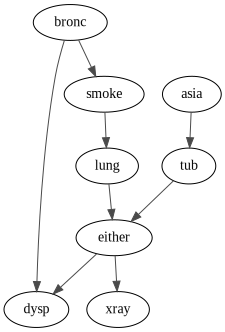

In [19]:
gnb.showDot(ndag.toDot())

In [20]:
cbn = otagr.ContinuousBayesianNetwork(ndag, jointDistributions)

In [26]:
ll = 0
count=0
for (i,t) in zip(range(len(test)),test):
    print("Iteration ", i+1)
    print("Ligne en entrée ", t)
    lp = cbn.computeLogPDF(t)
    #if (np.abs(lp) < 10):
    if True:
        ll += lp
        count += 1
    print("Delta ", lp)
    print("Valeur de la somme ", ll)
    print("\n")
ll /= count

Iteration  1
Ligne en entrée  [0.338268,0.59873,0.365036,0.721328,0.924264,0.936416,0.571251,0.750876]
Delta  1.5470785722560911
Valeur de la somme  1.5470785722560911


Iteration  2
Ligne en entrée  [0.307391,0.134903,0.489386,0.177256,0.213784,0.184236,0.39467,0.699053]
Delta  2.556433690493175
Valeur de la somme  4.103512262749266


Iteration  3
Ligne en entrée  [0.677044,0.823763,0.915282,0.79443,0.680165,0.305782,0.840679,0.343819]
Delta  0.2851831262427155
Valeur de la somme  4.388695388991982


Iteration  4
Ligne en entrée  [0.662157,0.280408,0.250468,0.459134,0.140452,0.0983278,0.210167,0.139863]
Delta  1.863191379070142
Valeur de la somme  6.251886768062124


Iteration  5
Ligne en entrée  [0.472701,0.789501,0.244749,0.279824,0.564252,0.579389,0.442865,0.361384]
Delta  0.9075429823485852
Valeur de la somme  7.159429750410709


Iteration  6
Ligne en entrée  [0.659059,0.264536,0.591928,0.611491,0.627665,0.809819,0.716886,0.407724]
Delta  0.2535601645068941
Valeur de la somme  7.4

Delta  1.9996336022315981
Valeur de la somme  339.8818447102202


Iteration  223
Ligne en entrée  [0.213777,0.187253,0.210251,0.566301,0.444753,0.15361,0.611957,0.919614]
Delta  -0.826645828548038
Valeur de la somme  339.0551988816722


Iteration  224
Ligne en entrée  [0.0374921,0.0580122,0.18519,0.217174,0.0888907,0.152693,0.114699,0.312059]
Delta  5.489978946898728
Valeur de la somme  344.5451778285709


Iteration  225
Ligne en entrée  [0.702208,0.275531,0.839359,0.901233,0.529113,0.260882,0.733059,0.774515]
Delta  -0.04874814904966786
Valeur de la somme  344.4964296795212


Iteration  226
Ligne en entrée  [0.0891334,0.0518163,0.665873,0.578708,0.365385,0.395227,0.771476,0.821845]
Delta  2.223238455389457
Valeur de la somme  346.71966813491065


Iteration  227
Ligne en entrée  [0.72764,0.923715,0.99989,0.995438,0.991835,0.965313,0.998007,0.996774]
Delta  11.249723797926675
Valeur de la somme  357.9693919328373


Iteration  228
Ligne en entrée  [0.523212,0.635518,0.950478,0.878915,0.4

Delta  5.325969763764963
Valeur de la somme  774.945325675341


Iteration  477
Ligne en entrée  [0.241989,0.231005,0.0505018,0.123215,0.139329,0.748809,0.0680684,0.199311]
Delta  2.1355575708411028
Valeur de la somme  777.0808832461821


Iteration  478
Ligne en entrée  [0.388076,0.469207,0.0209198,0.25219,0.858882,0.901023,0.214195,0.55029]
Delta  -0.979926423591546
Valeur de la somme  776.1009568225905


Iteration  479
Ligne en entrée  [0.264337,0.299166,0.364087,0.137341,0.221814,0.696144,0.529715,0.7316]
Delta  1.620679685380272
Valeur de la somme  777.7216365079709


Iteration  480
Ligne en entrée  [0.225348,0.415528,0.378486,0.403954,0.252086,0.0793292,0.176841,0.0551262]
Delta  1.4392245327908413
Valeur de la somme  779.1608610407617


Iteration  481
Ligne en entrée  [0.331104,0.450913,0.260853,0.612535,0.445551,0.316773,0.115835,0.122656]
Delta  2.7656921906743044
Valeur de la somme  781.926553231436


Iteration  482
Ligne en entrée  [0.392726,0.512063,0.111653,0.236996,0.364335

Delta  0.7016940737760532
Valeur de la somme  1242.5082294495965


Iteration  738
Ligne en entrée  [0.0320032,0.0182614,0.0383153,0.230701,0.0591347,0.129133,0.177917,0.473089]
Delta  5.688211914553978
Valeur de la somme  1248.1964413641504


Iteration  739
Ligne en entrée  [0.363664,0.198138,0.38707,0.426347,0.148744,0.100077,0.552884,0.616346]
Delta  3.001931825313393
Valeur de la somme  1251.1983731894638


Iteration  740
Ligne en entrée  [0.382544,0.497986,0.339149,0.22468,0.536428,0.567086,0.344127,0.776842]
Delta  0.6386463281679176
Valeur de la somme  1251.8370195176317


Iteration  741
Ligne en entrée  [0.804926,0.53356,0.405034,0.120263,0.242455,0.176742,0.340578,0.276174]
Delta  1.9170294177345264
Valeur de la somme  1253.7540489353662


Iteration  742
Ligne en entrée  [0.848295,0.81916,0.22635,0.218906,0.502345,0.572656,0.0438403,0.200078]
Delta  1.3435399712820686
Valeur de la somme  1255.0975889066483


Iteration  743
Ligne en entrée  [0.0596468,0.00903966,0.997955,0.65049

In [27]:
print(ll)

1.671620405186039
